# Import packages

In [149]:
import pandas as pd


In [150]:
import plotly.express as px

In [151]:
import matplotlib.pyplot as plt

In [152]:
import seaborn as sns

In [153]:
import json

# Upload the data into a DataFrame

Note : les donnees utilisees datent du 18.01.2024

In [154]:
with open('/content/data_search.json', 'r') as f:
  content = json.load(f)

In [155]:
df = pd.DataFrame(content)

# Explorations

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49990 entries, 0 to 49989
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     49990 non-null  object 
 1   type                     49990 non-null  object 
 2   url                      49990 non-null  object 
 3   global_id                3662 non-null   object 
 4   description              28475 non-null  object 
 5   published_at             49990 non-null  object 
 6   publisher                3662 non-null   object 
 7   citationHtml             3662 non-null   object 
 8   identifier_of_dataverse  3662 non-null   object 
 9   name_of_dataverse        3662 non-null   object 
 10  citation                 3662 non-null   object 
 11  storageIdentifier        3662 non-null   object 
 12  subjects                 3662 non-null   object 
 13  fileCount                3662 non-null   float64
 14  versionId             

In [157]:
df['type'].value_counts()

file         45580
dataset       3662
dataverse      748
Name: type, dtype: int64

In [158]:
df.columns

Index(['name', 'type', 'url', 'global_id', 'description', 'published_at',
       'publisher', 'citationHtml', 'identifier_of_dataverse',
       'name_of_dataverse', 'citation', 'storageIdentifier', 'subjects',
       'fileCount', 'versionId', 'versionState', 'majorVersion',
       'minorVersion', 'createdAt', 'updatedAt', 'contacts', 'publications',
       'geographicCoverage', 'authors', 'file_id', 'file_type',
       'file_content_type', 'size_in_bytes', 'md5', 'checksum',
       'file_persistent_id', 'dataset_name', 'dataset_id',
       'dataset_persistent_id', 'dataset_citation', 'unf', 'keywords',
       'producers', 'dataSources', 'relatedMaterial', 'identifier'],
      dtype='object')

**columns they all have** : 'name', 'type', 'url', 'description'

 **only file have :** 'file_id', 'file_type', 'file_content_type' 'size_in_bytes', 'md5', 'checksum',   'file_persistent_id', 'dataset_name', 'dataset_id', 'dataset_persistent_id', 'dataset_citation'

**only dataset have :** 'global_id', 'publisher', 'citationHtml', 'identifier_of_dataverse', 'name_of_dataverse', 'citation', 'storageIdentifier', 'subjects', 'fileCount', 'versionId', 'versionState', 'createdAt', 'updatedAt', 'contacts', 'authors'

**only dataverse have :** 'identifier'

**mixed between the types (TBD) :**   'description', 'majorVersion', 'minorVersion', 'publications','geographicCoverage', 'unf', 'keywords', 'producers', 'dataSources', 'relatedMaterial',

# Description analysis

In [159]:
df_description = df[df['description'].notna()]

In [160]:
df_description['type'].value_counts()

file         24273
dataset       3662
dataverse      540
Name: type, dtype: int64

**All the datasets have a description**

In [162]:
df_description['descr_len'] = df_description['description'].str.len()

<ipython-input-162-07eac87c3ab7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_description['descr_len'] = df_description['description'].str.len()


In [164]:
df_description['descr_len'].value_counts()

0       16534
18        196
240       169
46        147
22        140
        ...  
884         1
1349        1
2573        1
1019        1
1674        1
Name: descr_len, Length: 1691, dtype: int64

In [165]:
df_description_1 = df_description[df_description['descr_len'] != 0]

In [166]:
df_description_1['type'].value_counts()

file         7739
dataset      3662
dataverse     540
Name: type, dtype: int64

In [167]:
df_description_1['descr_len'].value_counts()

18      196
240     169
46      147
22      140
7       127
       ... 
884       1
1349      1
2573      1
1019      1
1674      1
Name: descr_len, Length: 1690, dtype: int64

In [168]:
df_description_1['descr_len'].describe()

count    11941.000000
mean       342.816850
std        717.204782
min          1.000000
25%         46.000000
50%        105.000000
75%        294.000000
max      12865.000000
Name: descr_len, dtype: float64

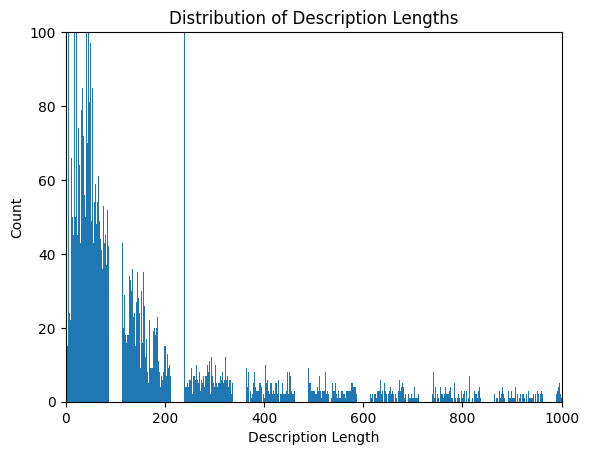

In [169]:
# Plot the value counts
plt.bar(df_description_1['descr_len'].value_counts().index, df_description_1['descr_len'].value_counts().values)
# Set the x-axis limits (adjust these values as needed)
plt.xlim(0, 1000)

# Set the y-axis limits (adjust these values as needed)
plt.ylim(0, 100)
plt.xlabel('Description Length')
plt.ylabel('Count')
plt.title('Distribution of Description Lengths')
plt.show()


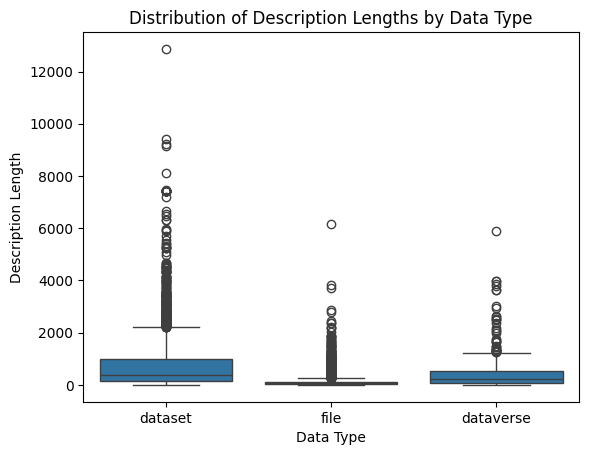

In [170]:
# Create a boxplot using Seaborn
sns.boxplot(x='type', y='descr_len', data=df_description_1)

plt.xlabel('Data Type')
plt.ylabel('Description Length')
plt.title('Distribution of Description Lengths by Data Type')
plt.show()

# Keywords analysis

In [171]:
df_keywords = df[df['keywords'].notna()]

In [172]:
df_keywords['type'].value_counts()

dataset    2622
Name: type, dtype: int64

In [173]:
df_description_1['keywords'].count()

2622

The only documents with keywords are datasets.

# Date analysis

In [174]:
df.head(10)

,name,type,url,global_id,description,published_at,publisher,citationHtml,identifier_of_dataverse,name_of_dataverse,...,dataset_name,dataset_id,dataset_persistent_id,dataset_citation,unf,keywords,producers,dataSources,relatedMaterial,identifier
0,Positive mode LC-MS metabolomics of tomato fru...,dataset,https://doi.org/10.15454/IFPJAP,doi:10.15454/IFPJAP,Positive mode LC-MS metabolomic profiling of 1...,2020-07-03T15:04:19Z,Metabolome of tomato fruit pericarp of gbp1-c ...,"Bernillon, St&eacute;phane, 2020, ""Positive mo...",Sl-gbp1,Metabolome of tomato fruit pericarp of gbp1-c ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MET-2018-P13-CM_LCMS_annotation_table.xlsx,file,https://entrepot.recherche.data.gouv.fr/api/ac...,NaN,List of annotated variables,2020-07-03T15:04:19Z,NaN,NaN,NaN,NaN,...,Positive mode LC-MS metabolomics of tomato fru...,100017,doi:10.15454/IFPJAP,"Bernillon, Stéphane, 2020, ""Positive mode LC-M...",NaN,NaN,NaN,NaN,NaN,NaN
2,MET-2018-P13-CM_LCMS_pos_data.7z,file,https://entrepot.recherche.data.gouv.fr/api/ac...,NaN,48 negative mode LC-MS acquisitions of samples...,2020-07-03T15:04:19Z,NaN,NaN,NaN,NaN,...,Positive mode LC-MS metabolomics of tomato fru...,100017,doi:10.15454/IFPJAP,"Bernillon, Stéphane, 2020, ""Positive mode LC-M...",NaN,NaN,NaN,NaN,NaN,NaN
3,MET-2018-P13-CM_LCMS_pos_DWnorm_MSDIAL_output_...,file,https://entrepot.recherche.data.gouv.fr/api/ac...,NaN,Data output from MSDIAL software with an addit...,2020-07-03T15:04:19Z,NaN,NaN,NaN,NaN,...,Positive mode LC-MS metabolomics of tomato fru...,100017,doi:10.15454/IFPJAP,"Bernillon, Stéphane, 2020, ""Positive mode LC-M...",NaN,NaN,NaN,NaN,NaN,NaN
4,MET-2018-P13-CM_LCMS_pos_MSDIAL_Parameters_4_2...,file,https://entrepot.recherche.data.gouv.fr/api/ac...,NaN,used parameters with MSDial v3.66,2020-07-03T15:04:19Z,NaN,NaN,NaN,NaN,...,Positive mode LC-MS metabolomics of tomato fru...,100017,doi:10.15454/IFPJAP,"Bernillon, Stéphane, 2020, ""Positive mode LC-M...",NaN,NaN,NaN,NaN,NaN,NaN
5,MET-2018-P13-CM_SOP for LCMS metabolomics prof...,file,https://entrepot.recherche.data.gouv.fr/api/ac...,NaN,,2020-07-03T15:04:19Z,NaN,NaN,NaN,NaN,...,Positive mode LC-MS metabolomics of tomato fru...,100017,doi:10.15454/IFPJAP,"Bernillon, Stéphane, 2020, ""Positive mode LC-M...",NaN,NaN,NaN,NaN,NaN,NaN
6,Negative mode LC-MS metabolomics of tomato fru...,dataset,https://doi.org/10.15454/YVKQRW,doi:10.15454/YVKQRW,Negative mode LC-MS metabolomic profiling of 1...,2020-07-02T08:32:21Z,Metabolome of tomato fruit pericarp of gbp1-c ...,"Bernillon, St&eacute;phane, 2020, ""Negative mo...",Sl-gbp1,Metabolome of tomato fruit pericarp of gbp1-c ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,MET-2018-P13-CM_DWnorm_MSDIAL_output_Normalize...,file,https://entrepot.recherche.data.gouv.fr/api/ac...,NaN,Data output from MSDIAL software with an addit...,2020-07-02T08:32:21Z,NaN,NaN,NaN,NaN,...,Negative mode LC-MS metabolomics of tomato fru...,100007,doi:10.15454/YVKQRW,"Bernillon, Stéphane, 2020, ""Negative mode LC-M...",NaN,NaN,NaN,NaN,NaN,NaN
8,MET-2018-P13-CM_LCMS_ annotation_table.xlsx,file,https://entrepot.recherche.data.gouv.fr/api/ac...,NaN,List of annotated variables,2020-07-02T08:32:21Z,NaN,NaN,NaN,NaN,...,Negative mode LC-MS metabolomics of tomato fru...,100007,doi:10.15454/YVKQRW,"Bernillon, Stéphane, 2020, ""Negative mode LC-M...",NaN,NaN,NaN,NaN,NaN,NaN
9,MET-2018-P13-CM_LCMS_neg_ abf_data.7z,file,https://entrepot.recherche.data.gouv.fr/api/ac...,NaN,48 negative mode LC-MS acquisitions of samples...,2020-07-02T08:32:21Z,NaN,NaN,NaN,NaN,...,Negative mode LC-MS metabolomics of tomato fru...,100007,doi:10.15454/YVKQRW,"Bernillon, Stéphane, 2020, ""Negative mode LC-M...",NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
df['published_at'] = pd.to_datetime(df['published_at'])

In [176]:
df['published_at']

0       2020-07-03 15:04:19+00:00
1       2020-07-03 15:04:19+00:00
2       2020-07-03 15:04:19+00:00
3       2020-07-03 15:04:19+00:00
4       2020-07-03 15:04:19+00:00
                   ...           
49985   2023-12-06 01:00:04+00:00
49986   2023-12-07 01:00:04+00:00
49987   2023-12-14 01:00:03+00:00
49988   2024-01-17 01:00:15+00:00
49989   2024-01-17 01:00:15+00:00
Name: published_at, Length: 49990, dtype: datetime64[ns, UTC]

In [177]:
df['year_month'] = df['published_at'].dt.to_period('M')

df['year'] = df['published_at'].dt.year

<ipython-input-177-6967eab366df>:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['published_at'].dt.to_period('M')


In [207]:
df.groupby(df['year'])['description'].count()

year
2018      435
2019      669
2020     1770
2021     3660
2022     8039
2023    13653
2024      249
Name: description, dtype: int64

In [208]:
df.groupby(df['year'])['name'].count()

year
2018      939
2019     4363
2020     4087
2021     8482
2022    12163
2023    18849
2024     1107
Name: name, dtype: int64

In [212]:
filtered_df = df[df['type'] == 'dataset']

# Perform groupby and count the unique names
result = filtered_df.groupby('year')['name'].count()
result

year
2018      64
2019     145
2020     309
2021     745
2022     744
2023    1591
2024      64
Name: name, dtype: int64

In [183]:
df_description_1['published_at'] = pd.to_datetime(df_description_1['published_at'])

<ipython-input-183-0030c949ae2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_description_1['published_at'] = pd.to_datetime(df_description_1['published_at'])


In [184]:
df_description_1['year'] = df_description_1['published_at'].dt.year

<ipython-input-184-ad1fa6f9fadc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_description_1['year'] = df_description_1['published_at'].dt.year


In [211]:
filtered_df_descr = df_description_1[df_description_1['type'] == 'dataset']

# Perform groupby and count the unique names
result2 = filtered_df_descr.groupby('year')['name'].count()
result2

year
2018      64
2019     145
2020     309
2021     745
2022     744
2023    1591
2024      64
Name: name, dtype: int64

In [187]:
descr_year_type = df_description_1.groupby(['year', 'type'])['description'].nunique()

In [188]:
general_year_type = df.groupby(['year', 'type'])['name'].nunique()

In [189]:
df_year_type = pd.DataFrame(general_year_type)

In [190]:
df_desc_y_t = pd.DataFrame(descr_year_type)

In [191]:
df_year_type['with_description'] = df_desc_y_t['description']

In [192]:
df_year_type['description_score'] =  (df_year_type['with_description'] / df_year_type['name'])*100

In [193]:
df_year_type

name  with_description  description_score
year type                                                 
2018 dataset       64                59          92.187500
     dataverse     67                70         104.477612
     file         796               103          12.939698
2019 dataset      145               145         100.000000
     dataverse     26                21          80.769231
     file        4156               376           9.047161
2020 dataset      309               280          90.614887
     dataverse     68                46          67.647059
     file        3577               671          18.758736
2021 dataset      743               741          99.730821
     dataverse     67                39          58.208955
     file        5374              1349          25.102345
2022 dataset      743               741          99.730821
     dataverse    201               113          56.218905
     file       10980              1451          13.214936
2023 dataset     1586              1539          97.036570
     dataverse    281               218          77.580071
     file       16129              2328          14.433629
2024 dataset       64                64         100.000000
     dataverse     23                23         100.000000
     file        1019                68           6.673209

In [194]:
df_keywords['published_at'] = pd.to_datetime(df_keywords['published_at'])

<ipython-input-194-d12ec8910e94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_keywords['published_at'] = pd.to_datetime(df_keywords['published_at'])


In [195]:
df_keywords['year'] = df_keywords['published_at'].dt.year

<ipython-input-195-b65cc6d27948>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_keywords['year'] = df_keywords['published_at'].dt.year


In [196]:
df_keywords = pd.DataFrame(df_keywords)

In [198]:
keywords_year_type = df_keywords.groupby(['year', 'type'])['keywords'].count()

In [199]:
df_kw_y_t = pd.DataFrame(keywords_year_type)

In [201]:
df_year_type['with_keywords'] = df_kw_y_t['keywords']

In [202]:
df_year_type['keywords_score'] = (df_year_type['with_keywords'] / df_year_type['name'] ) * 100

In [203]:
df_year_type

name  with_description  description_score  with_keywords  \
year type                                                                   
2018 dataset       64                59          92.187500           37.0   
     dataverse     67                70         104.477612            NaN   
     file         796               103          12.939698            NaN   
2019 dataset      145               145         100.000000           39.0   
     dataverse     26                21          80.769231            NaN   
     file        4156               376           9.047161            NaN   
2020 dataset      309               280          90.614887          138.0   
     dataverse     68                46          67.647059            NaN   
     file        3577               671          18.758736            NaN   
2021 dataset      743               741          99.730821          503.0   
     dataverse     67                39          58.208955            NaN   
     file        5374              1349          25.102345            NaN   
2022 dataset      743               741          99.730821          575.0   
     dataverse    201               113          56.218905            NaN   
     file       10980              1451          13.214936            NaN   
2023 dataset     1586              1539          97.036570         1292.0   
     dataverse    281               218          77.580071            NaN   
     file       16129              2328          14.433629            NaN   
2024 dataset       64                64         100.000000           38.0   
     dataverse     23                23         100.000000            NaN   
     file        1019                68           6.673209            NaN   

                keywords_score  
year type                       
2018 dataset         57.812500  
     dataverse             NaN  
     file                  NaN  
2019 dataset         26.896552  
     dataverse             NaN  
     file                  NaN  
2020 dataset         44.660194  
     dataverse             NaN  
     file                  NaN  
2021 dataset         67.698520  
     dataverse             NaN  
     file                  NaN  
2022 dataset         77.388964  
     dataverse             NaN  
     file                  NaN  
2023 dataset         81.462799  
     dataverse             NaN  
     file                  NaN  
2024 dataset         59.375000  
     dataverse             NaN  
     file                  NaN

In [205]:
df_year_type['score'] = (df_year_type['description_score'] + df_year_type['keywords_score'])/2

In [206]:
df_year_type

name  with_description  description_score  with_keywords  \
year type                                                                   
2018 dataset       64                59          92.187500           37.0   
     dataverse     67                70         104.477612            NaN   
     file         796               103          12.939698            NaN   
2019 dataset      145               145         100.000000           39.0   
     dataverse     26                21          80.769231            NaN   
     file        4156               376           9.047161            NaN   
2020 dataset      309               280          90.614887          138.0   
     dataverse     68                46          67.647059            NaN   
     file        3577               671          18.758736            NaN   
2021 dataset      743               741          99.730821          503.0   
     dataverse     67                39          58.208955            NaN   
     file        5374              1349          25.102345            NaN   
2022 dataset      743               741          99.730821          575.0   
     dataverse    201               113          56.218905            NaN   
     file       10980              1451          13.214936            NaN   
2023 dataset     1586              1539          97.036570         1292.0   
     dataverse    281               218          77.580071            NaN   
     file       16129              2328          14.433629            NaN   
2024 dataset       64                64         100.000000           38.0   
     dataverse     23                23         100.000000            NaN   
     file        1019                68           6.673209            NaN   

                keywords_score      score  
year type                                  
2018 dataset         57.812500  75.000000  
     dataverse             NaN        NaN  
     file                  NaN        NaN  
2019 dataset         26.896552  63.448276  
     dataverse             NaN        NaN  
     file                  NaN        NaN  
2020 dataset         44.660194  67.637540  
     dataverse             NaN        NaN  
     file                  NaN        NaN  
2021 dataset         67.698520  83.714670  
     dataverse             NaN        NaN  
     file                  NaN        NaN  
2022 dataset         77.388964  88.559892  
     dataverse             NaN        NaN  
     file                  NaN        NaN  
2023 dataset         81.462799  89.249685  
     dataverse             NaN        NaN  
     file                  NaN        NaN  
2024 dataset         59.375000  79.687500  
     dataverse             NaN        NaN  
     file                  NaN        NaN